In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

In [10]:
image = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/Inputs/Arp256.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


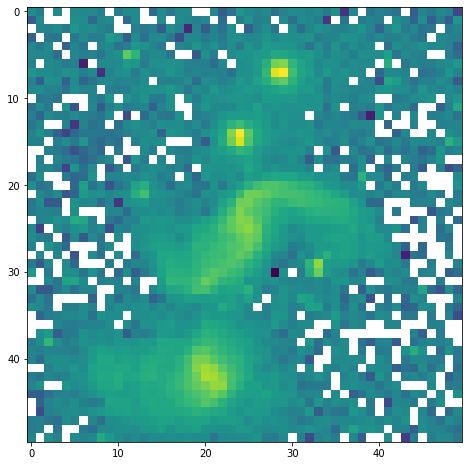

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(image))

In [12]:
clipped_image = sigma_clip(image,sigma=10,maxiters=1,cenfunc = 'median')

In [14]:
mask = clipped_image.mask

In [15]:
stellar_pixels = np.where(mask)

In [17]:
image_test = image.copy()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


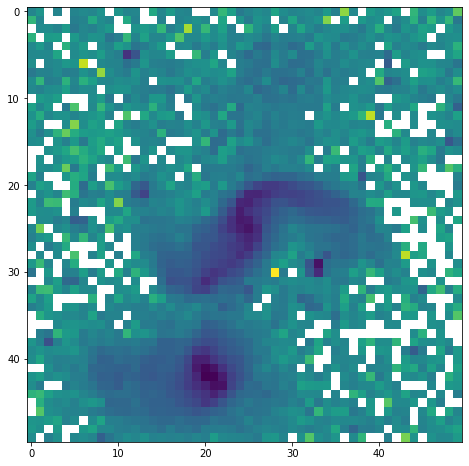

In [18]:
for i in range(len(stellar_pixels[0])):
    x = stellar_pixels[0][i]
    y = stellar_pixels[1][i]
    
    if x - 3 < 0:
        x = x + 3
    if x + 3 > image.shape[0]:
        x = image.shape[0] - 3
    if y - 3 < 0:
        y = y + 3
    if y + 3 > image.shape[1]:
        y = image.shape[1] - 3
    
    replacement = np.median(image[x-3:x+3,y-3:y+3])*np.random.random([6,6])
    
    image_test[x-3:x+3,y-3:y+3] = replacement

plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(image_test) - 48.6)

In [108]:
binary_image = -2.5*np.log10(image_test) - 48.6

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [109]:
binary_image

array([[22.80941786, 23.72761299,         nan, ..., 22.89069616,
        23.44803499, 27.15978244],
       [25.72252531, 22.89706362,         nan, ..., 23.67595421,
        25.82365173, 22.00338177],
       [        nan, 23.18781308, 23.24841738, ...,         nan,
        23.93494105, 23.11674044],
       ...,
       [23.77015454, 23.62955032, 24.12814663, ..., 24.37559935,
        22.71024012, 23.44653739],
       [23.9184648 , 23.4585176 ,         nan, ..., 23.35598634,
        23.9232077 , 24.58691827],
       [23.2634541 ,         nan, 22.55098032, ..., 22.98430634,
        23.06816233, 24.09719829]])

In [110]:
binary_image[binary_image < 15] = 0
binary_image[binary_image > 21] = 0
binary_image[np.isnan(binary_image)] = 0
binary_image[binary_image > 0] = 1

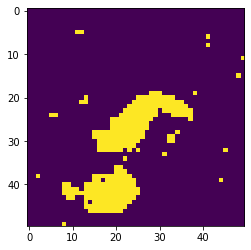

In [111]:
plt.figure()
plt.imshow(binary_image)

In [87]:
disk_image_path = 'C:\\Users\\oryan\\Documents\\PySPAM_Original_Python_MCMC\\notebooks\\images\\disk_image_1.npy'

In [88]:
disk_image = np.load(disk_image_path)

In [89]:
disk_image_binary = disk_image.copy()

In [90]:
disk_image_binary[disk_image_binary > 0] = 1

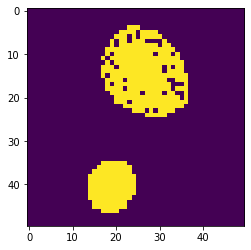

In [91]:
plt.imshow(disk_image_binary)

In [92]:
np.sum((binary_image - disk_image_binary)**2)/25

18.84

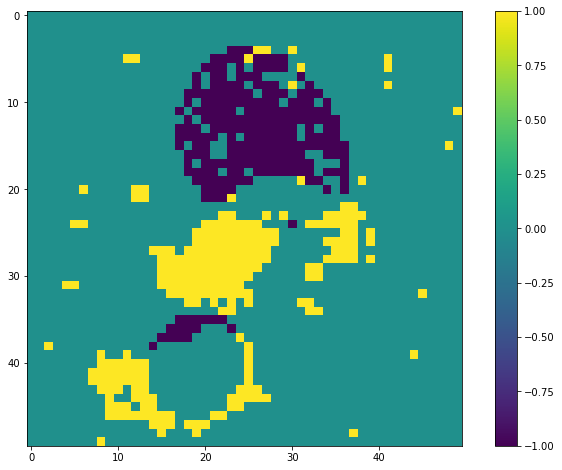

In [93]:
plt.figure(figsize=(12,8))
plt.imshow(binary_image - disk_image_binary)
plt.colorbar()